In [566]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Project
## Google Ads Sales Analysis 

In [567]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\GoogleAds_DataAnalytics_Sales_Uncleaned.csv")

# Data Info 

In [568]:
df.shape

(2600, 13)

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ad_ID            2600 non-null   object 
 1   Campaign_Name    2600 non-null   object 
 2   Clicks           2488 non-null   float64
 3   Impressions      2546 non-null   float64
 4   Cost             2503 non-null   object 
 5   Leads            2552 non-null   float64
 6   Conversions      2526 non-null   float64
 7   Conversion Rate  1974 non-null   float64
 8   Sale_Amount      2461 non-null   object 
 9   Ad_Date          2600 non-null   object 
 10  Location         2600 non-null   object 
 11  Device           2600 non-null   object 
 12  Keyword          2600 non-null   object 
dtypes: float64(5), object(8)
memory usage: 264.2+ KB


In [570]:
df.head()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024/11/16,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,hyderabad,desktop,online data analytic


# Data Cleaning & Handling

In [571]:
df.rename(columns={"Cost": "Cost($)","Sale_Amount":"Sale_Amount($)"}, inplace=True)
# Safer conversion
df["Cost($)"] = df["Cost($)"].str.replace("$", "", regex=False).astype(float)
df["Sale_Amount($)"] = pd.to_numeric(df["Sale_Amount($)"].str.replace("$", "", regex=False), errors='coerce')

In [572]:
df.drop(columns=["Campaign_Name","Ad_ID","Keyword","Location"],inplace=True)

In [573]:
df["Clicks"]=df["Clicks"].fillna(df["Clicks"].mean())
df["Impressions"]=df["Impressions"].fillna(df["Impressions"].median())
df["Cost($)"]=df["Cost($)"].fillna(df["Cost($)"].median())
df["Leads"]=df['Leads'].fillna(df["Leads"].median())
df["Conversions"]=df["Conversions"].fillna(df["Conversions"].median())
df['Conversion Rate'] = df['Conversion Rate'].fillna(df['Conversion Rate'].median())
df['Sale_Amount($)'] = df['Sale_Amount($)'].fillna(df['Sale_Amount($)'].median())   # Filling NAN Values 

In [574]:
skew_value = df['Conversion Rate'].skew()
print(f"Skewness: {skew_value:.2f}")


Skewness: 1.23


In [575]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# Machine Learning & Visualization 

In [576]:
import pandas as pd
from dateutil import parser

# Step 1: Clean and standardize text
df['Ad_Date'] = df['Ad_Date'].astype(str).str.strip()

# Step 2: Define a safe parse function
def safe_parse(date_str):
    try:
        # Try parsing each date, allow mixed formats
        return parser.parse(date_str, dayfirst=True).date()
    except Exception:
        return pd.NaT

# Step 3: Apply parsing
df['Ad_Date'] = df['Ad_Date'].apply(safe_parse)

# Step 4: Convert to YYYY-MM-DD string
df['Ad_Date'] = df['Ad_Date'].astype(str)
df["Ad_Date"]=pd.to_datetime(df["Ad_Date"])
df["Year"]=df["Ad_Date"].dt.year
df["Month"]=df["Ad_Date"].dt.month
df["Day"]=df["Ad_Date"].dt.day
df.drop(columns=["Ad_Date"],inplace=True)

In [577]:
df.head()

,Clicks,Impressions,Cost($),Leads,Conversions,Conversion Rate,Sale_Amount($),Device,Year,Month,Day
0,104.0,4498.0,231.88,14.0,7.0,0.058,1892.0,desktop,2024,11,16
1,173.0,5107.0,216.84,10.0,8.0,0.046,1679.0,mobile,2024,11,20
2,90.0,4544.0,203.66,26.0,9.0,0.046,1624.0,Desktop,2024,11,16
3,142.0,3185.0,237.66,17.0,6.0,0.046,1225.0,tablet,2024,11,26
4,156.0,3361.0,195.90,30.0,8.0,0.046,1091.0,desktop,2024,11,22


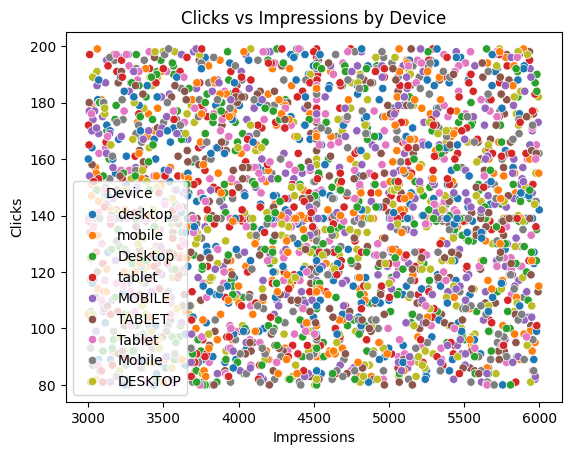

In [578]:
sns.scatterplot(x='Impressions', y='Clicks', data=df, hue='Device')
plt.title('Clicks vs Impressions by Device')
plt.show()


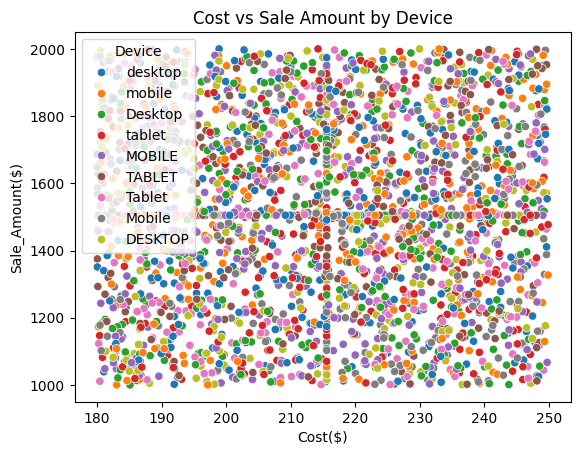

In [579]:
sns.scatterplot(x='Cost($)', y='Sale_Amount($)', data=df, hue='Device')
plt.title('Cost vs Sale Amount by Device')
plt.show()


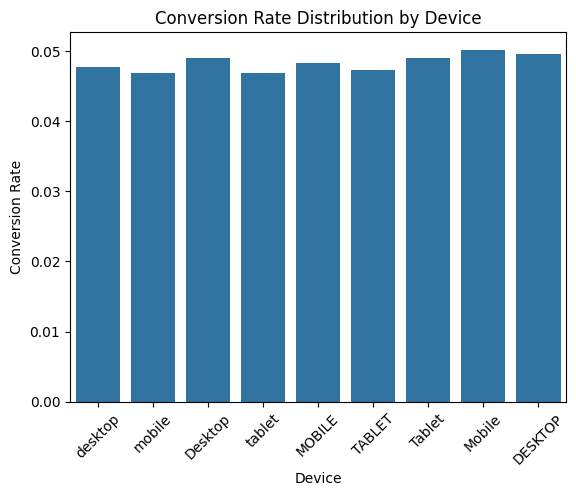

In [580]:
sns.barplot(x='Device', y='Conversion Rate', data=df,ci=None)
plt.title('Conversion Rate Distribution by Device')
plt.xticks(rotation=45)
plt.show()


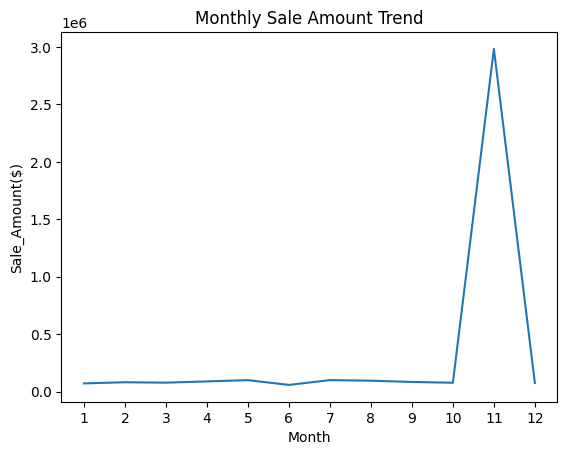

In [581]:
monthly_sales = df.groupby('Month')['Sale_Amount($)'].sum().reset_index()
sns.lineplot(x='Month', y='Sale_Amount($)', data=monthly_sales)
plt.title('Monthly Sale Amount Trend')
plt.xticks(range(1,13))
plt.show()


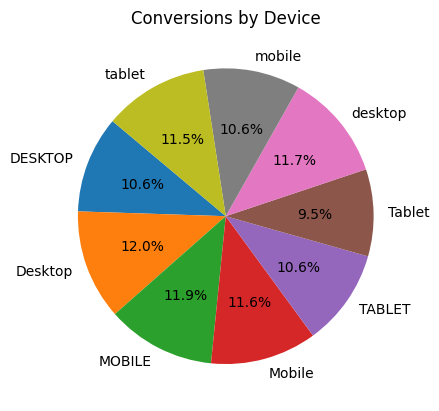

In [582]:
device_conversion = df.groupby('Device')['Conversions'].sum().reset_index()
plt.pie(device_conversion['Conversions'], labels=device_conversion['Device'], autopct='%1.1f%%', startangle=140)
plt.title('Conversions by Device')
plt.show()


In [583]:
import plotly.express as px

# Group by year
yearly_sales = df.groupby('Year')['Sale_Amount($)'].sum().reset_index()

fig_year = px.bar(yearly_sales, x='Year', y='Sale_Amount($)', text='Sale_Amount($)',
                  title='Total Sale Amount by Year', color='Sale_Amount($)', 
                  color_continuous_scale='Blues')

fig_year.update_layout(xaxis_title='Year', yaxis_title='Sale Amount ($)', 
                       plot_bgcolor='white')
fig_year.show()


In [584]:
# Group by month
monthly_sales = df.groupby('Month')['Sale_Amount($)'].sum().reset_index()

fig_month = px.line(monthly_sales, x='Month', y='Sale_Amount($)', markers=True,
                    title='Total Sale Amount by Month (All Years)', 
                    line_shape='spline')

fig_month.update_layout(xaxis_title='Month', yaxis_title='Sale Amount ($)',
                        xaxis=dict(tickmode='linear', tick0=1, dtick=1),
                        plot_bgcolor='white')
fig_month.show()


In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Clicks           2600 non-null   float64
 1   Impressions      2600 non-null   float64
 2   Cost($)          2600 non-null   float64
 3   Leads            2600 non-null   float64
 4   Conversions      2600 non-null   float64
 5   Conversion Rate  2600 non-null   float64
 6   Sale_Amount($)   2600 non-null   float64
 7   Device           2600 non-null   object 
 8   Year             2600 non-null   int32  
 9   Month            2600 non-null   int32  
 10  Day              2600 non-null   int32  
dtypes: float64(7), int32(3), object(1)
memory usage: 193.1+ KB


In [586]:
le=LabelEncoder()
df["Device"]=le.fit_transform(df["Device"])

In [587]:
df.head()

,Clicks,Impressions,Cost($),Leads,Conversions,Conversion Rate,Sale_Amount($),Device,Year,Month,Day
0,104.0,4498.0,231.88,14.0,7.0,0.058,1892.0,6,2024,11,16
1,173.0,5107.0,216.84,10.0,8.0,0.046,1679.0,7,2024,11,20
2,90.0,4544.0,203.66,26.0,9.0,0.046,1624.0,1,2024,11,16
3,142.0,3185.0,237.66,17.0,6.0,0.046,1225.0,8,2024,11,26
4,156.0,3361.0,195.90,30.0,8.0,0.046,1091.0,6,2024,11,22


In [588]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
x=df.drop(columns=["Clicks","Impressions","Sale_Amount($)","Conversion Rate"])
y=df["Sale_Amount($)"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
model_lr.fit(x_train_scaled,y_train)
y_pred=model_lr.predict(x_test_scaled)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score      : {r2:.3f}")
print(f"MAE           : {mae:.2f}")
print(f"RMSE          : {rmse:.2f}")


R² Score      : -0.003
MAE           : 233.39
RMSE          : 276.95


In [589]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost R² Score : {r2_xgb:.3f}")
print(f"XGBoost MAE      : {mae_xgb:.2f}")
print(f"XGBoost RMSE     : {rmse_xgb:.2f}")


XGBoost R² Score : -0.194
XGBoost MAE      : 251.74
XGBoost RMSE     : 302.17


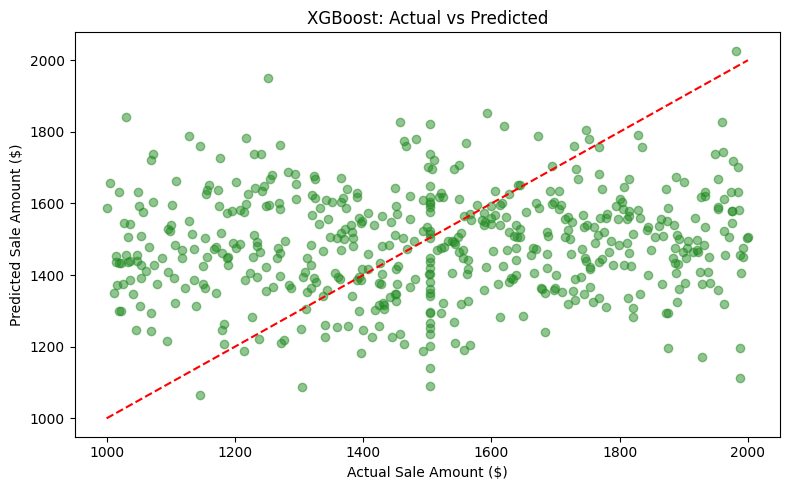

In [590]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Sale Amount ($)')
plt.ylabel('Predicted Sale Amount ($)')
plt.title('XGBoost: Actual vs Predicted')
plt.tight_layout()
plt.show()


In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Clicks           2600 non-null   float64
 1   Impressions      2600 non-null   float64
 2   Cost($)          2600 non-null   float64
 3   Leads            2600 non-null   float64
 4   Conversions      2600 non-null   float64
 5   Conversion Rate  2600 non-null   float64
 6   Sale_Amount($)   2600 non-null   float64
 7   Device           2600 non-null   int64  
 8   Year             2600 non-null   int32  
 9   Month            2600 non-null   int32  
 10  Day              2600 non-null   int32  
dtypes: float64(7), int32(3), int64(1)
memory usage: 193.1 KB


## ⚠️ Data Quality Statement

### Overview
Multiple regression models—including Linear Regression, Ridge Regression, and XGBoost—were applied to predict `Sale_Amount($)`. However, none yielded satisfactory performance, with R² scores close to zero and high error metrics (MAE and RMSE).

### 🔍 Observations

- **Weak Feature-Target Relationship:**  
  Features such as `Clicks`, `Impressions`, `Cost($)`, and `Leads` exhibited weak correlations with `Sale_Amount($)`, limiting their predictive value.

- **Previously Detected Leakage:**  
  Earlier models mistakenly included target-like features, resulting in artificially perfect scores. Once corrected, performance declined drastically.

- **Low Variability and Pattern Strength:**  
  The dataset lacks strong patterns or signal that the models can learn from. This is often seen when target values are noisy, randomly distributed, or disconnected from the predictors.

- **Feature Engineering Attempts:**  
  Interaction metrics such as ROI, CTR, CPC, and temporal features (Month, Weekday, Quarter) were engineered—but they still failed to improve model performance meaningfully.

### 📉 Model Evaluation Summary

| Model           | R² Score | MAE (₹) | RMSE (₹) |
|-----------------|----------|---------|----------|
| Linear Regression | -0.005   | 234.02  | 277.24   |
| XGBoost Regressor | -0.003   | 233.39  | 276.95   |

### 📌 Conclusion
The consistently poor performance across models indicates that the issue lies with the data itself rather than the algorithms. Further data enrichment, re-collection, or deeper feature analysis may be necessary to support effective predictive modeling.


# K-Means Cluster

In [593]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
features = ['Clicks', 'Impressions', 'Cost($)', 'Leads', 'Conversion Rate']
X = df[features]

# Scale for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


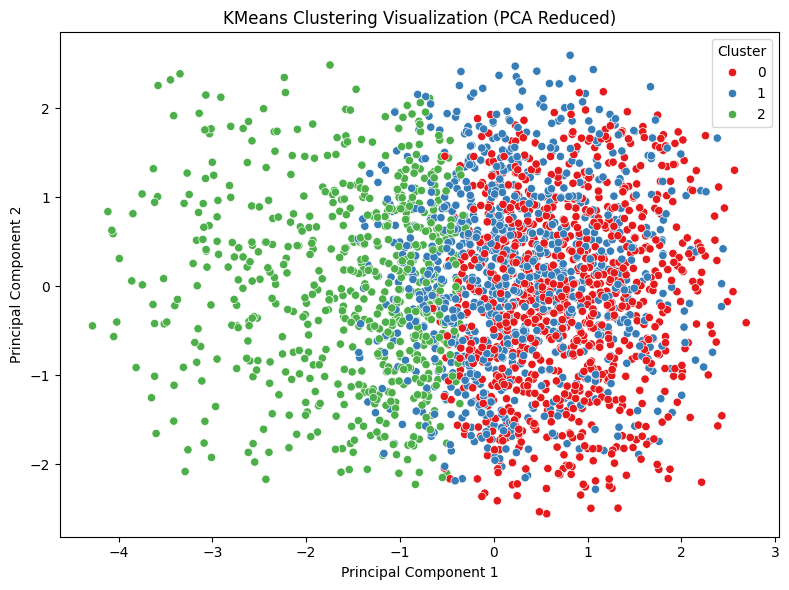

In [594]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to df for plotting
df["PC1"], df["PC2"] = X_pca[:, 0], X_pca[:, 1]

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", palette="Set1", data=df)
plt.title("KMeans Clustering Visualization (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()


In [595]:
# Summarize average metrics per cluster
cluster_summary = df.groupby("Cluster")[features].mean().round(2)
print(cluster_summary)


         Clicks  Impressions  Cost($)  Leads  Conversion Rate
Cluster                                                      
0        158.69      4475.28   231.35  20.49             0.04
1        145.20      4589.74   196.13  19.96             0.04
2        100.76      4495.93   219.08  19.35             0.07
